# [IT8701] Introduction to Programming for Data Science: HDB Data Analysis

__Name__: Sng Tian Hao, Keith <br>
__Student ID__: 1273381F <br>
__Class__: C <br>
__Tutor__: Chia Yao An Kendrick

## Table of Contents
- [Libraries](#1)
- [Data analysis](#2)
    - [HDB BTO prices](#2_1)
    - [HLE applications by year](#2_2)
    - [HDB grants by year](#2_3)
    - [HDB resale prices](#2_4)
    - [HDB rental prices](#2_5)
- [Limitations of Study](#3)



__Aim__<br>
The objective of this analysis is to help prospective first-time home owners choose the best housing option in Singapore, whether a BTO flat, a resale flat, or through renting. <br>
By utilising five HDB datasets and creating various graphs with both the `numpy` and `matplotlib` library, we aim to reveal trends in these housing options, facilitating more informed decision-making.

__Datasets used__<br>
1. [Price Range of HDB Flats Offered](https://beta.data.gov.sg/collections/177/datasets/d_2d493bdcc1d9a44828b6e71cb095b88d/view)
2. [Number of applications for HDB Loan Eligibility Letters](https://beta.data.gov.sg/datasets/d_38ec7e5cd735d597ab85765d2ef1a39b/view)
3. [CPF Housing Grants Awarded by Type](https://beta.data.gov.sg/datasets/d_a223380e5856cf06f7eac223e5902230/view)
4. [Resale flat prices based on registration date from Jan-2017 onwards](https://beta.data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view)
5. [Renting Out of Flats 2024 (CSV)](https://beta.data.gov.sg/datasets/d_c9f57187485a850908655db0e8cfe651/view)

# 1. Import Libraries <a id = '1'></a> 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from helperFunc import get_coordinates
from matplotlib.ticker import FuncFormatter
from numpy.lib.recfunctions import append_fields

%config InlineBackend.figure_format='retina'

# 2. Data Analysis <a id = '2'></a> 

## 2.1. HDB BTO prices <a id = '2_1'></a>

As a first-time home owner, BTOs are likely to be the first housing option to be considered. Hence, the BTO price data from 2018-2021 is used to elucidate price trends across estates and room types.

__Load data__

In [2]:
# Read data and fill NA where applicable
bto = np.genfromtxt('../02_Data/PriceRangeofHDBFlatsOffered.csv', delimiter=',', skip_header=1,
                    dtype=[('financial_year', 'u8'), ('town', 'U50'), ('room_type', 'U50'), ('min_selling_price', 'i8'),
                           ('max_selling_price', 'i8'), ('min_selling_price_less_ahg_shg', 'i8'), ('max_selling_price_less_ahg_shg', 'i8')],
                    missing_values=['na'], filling_values=0)

# View first 5 rows
bto[:5]

array([(2008, 'Punggol', '2-room',  82000, 107000, 0, 0),
       (2008, 'Punggol', '3-room', 135000, 211000, 0, 0),
       (2008, 'Punggol', '4-room', 223000, 327000, 0, 0),
       (2008, 'Punggol', '5-room', 305000, 428000, 0, 0),
       (2008, 'Jurong West', '3-room', 142000, 160000, 0, 0)],
      dtype=[('financial_year', '<u8'), ('town', '<U50'), ('room_type', '<U50'), ('min_selling_price', '<i8'), ('max_selling_price', '<i8'), ('min_selling_price_less_ahg_shg', '<i8'), ('max_selling_price_less_ahg_shg', '<i8')])

__Data cleaning__

In [3]:
# Data cleaning, trailing whitespace detected in room type
bto['room_type'][bto['room_type'] == '2-room '] = '2-room'

# Create new feature for analysis
average_selling_price = (bto['max_selling_price'] + bto['min_selling_price']) / 2

# Append field to bto array
bto = append_fields(bto, 'average_selling_price', average_selling_price, usemask=False)

__Decsriptive stats__

In [4]:
# Define variables for header print
header = ' BTO flat prices from 2018 to 2021 '
bto_len = len(bto)

# Print header
print(f'{header:*^{len(header)+10}}')

# Print number of rows in dataset
print(f'There are a total of {bto_len:,} rows in this dataset\n')

# Get unique room types
room_types = np.unique(bto['room_type'])

# Descriptive stats for each room type
print(f'Within this dataset, there are {len(room_types)} unique room types')
print('For each room type, the following stats and information are extracted to elucidate trends in BTO prices\n')

# Create empty lists for appending descriptive stats for each room type
mean_price_by_room_type = []
price_sd_by_room_type = []
max_price_by_room_type = []
estate_of_max_price_by_room_type = []
year_of_max_price_by_room_type = []

# Iterate through list of room types to filter dataset relevant to each room type
for i in room_types:
    # Filter and get stats for each flat type
    mean_price = round(np.mean(bto[bto['room_type'] == i]['average_selling_price']), 2)
    price_std = round(np.std(bto[bto['room_type'] == i]['average_selling_price']), 2)
    max_price = np.max(bto[bto['room_type'] == i]['average_selling_price'])
    estate_max = bto[np.argmax(bto[bto['room_type'] == i]['average_selling_price'])]['town']
    month_max = bto[np.argmax(bto[bto['room_type'] == i]['average_selling_price'])]['financial_year']

    # Append summary statistic for each room type into respective list
    mean_price_by_room_type.append(mean_price)
    price_sd_by_room_type.append(price_std)
    max_price_by_room_type.append(max_price)
    estate_of_max_price_by_room_type.append(estate_max)
    year_of_max_price_by_room_type.append(month_max)

# Print out stats for each room type
for i in range(len(room_types)):
    print(f'{room_types[i]:*^{len(room_types[i])+6}}')
    print(f'Mean: ${mean_price_by_room_type[i]:,.2f}')
    print(f'Standard deviation: ${price_sd_by_room_type[i]:,.2f}')
    print(f'Max: ${max_price_by_room_type[i]:,.2f}')
    print(f'Estate of most expensive BTO: {estate_of_max_price_by_room_type[i]}')
    print(f'Year of most expensive BTO: {year_of_max_price_by_room_type[i]}\n')

***** BTO flat prices from 2018 to 2021 *****
There are a total of 277 rows in this dataset

Within this dataset, there are 4 unique room types
For each room type, the following stats and information are extracted to elucidate trends in BTO prices

***2-room***
Mean: $104,838.71
Standard deviation: $29,284.31
Max: $171,000.00
Estate of most expensive BTO: Punggol
Year of most expensive BTO: 2011

***3-room***
Mean: $181,465.75
Standard deviation: $33,882.59
Max: $269,500.00
Estate of most expensive BTO: Sengkang
Year of most expensive BTO: 2011

***4-room***
Mean: $289,506.76
Standard deviation: $34,303.15
Max: $407,500.00
Estate of most expensive BTO: Sengkang
Year of most expensive BTO: 2011

***5-room***
Mean: $333,360.29
Standard deviation: $129,104.89
Max: $487,000.00
Estate of most expensive BTO: Sengkang
Year of most expensive BTO: 2010



__`Bar plot` of BTO prices by room type and estate__

In [5]:
# Get unique estates
estates = np.unique(bto['town'])

# Store mean price of each room type per estate as a list of arrays
mean_price_by_estate_room_type = []

# Iterate through each room type: one room type = one array
for estate in estates:
    mean_price = []
    # Iterate through each estate and calculate mean price for that estate
    for room in room_types:
        mean_price.append(round(np.mean(bto[(bto['town'] == estate) & (bto['room_type'] == room)]['average_selling_price']), 2))
    mean_price_by_estate_room_type.append(np.array(mean_price))

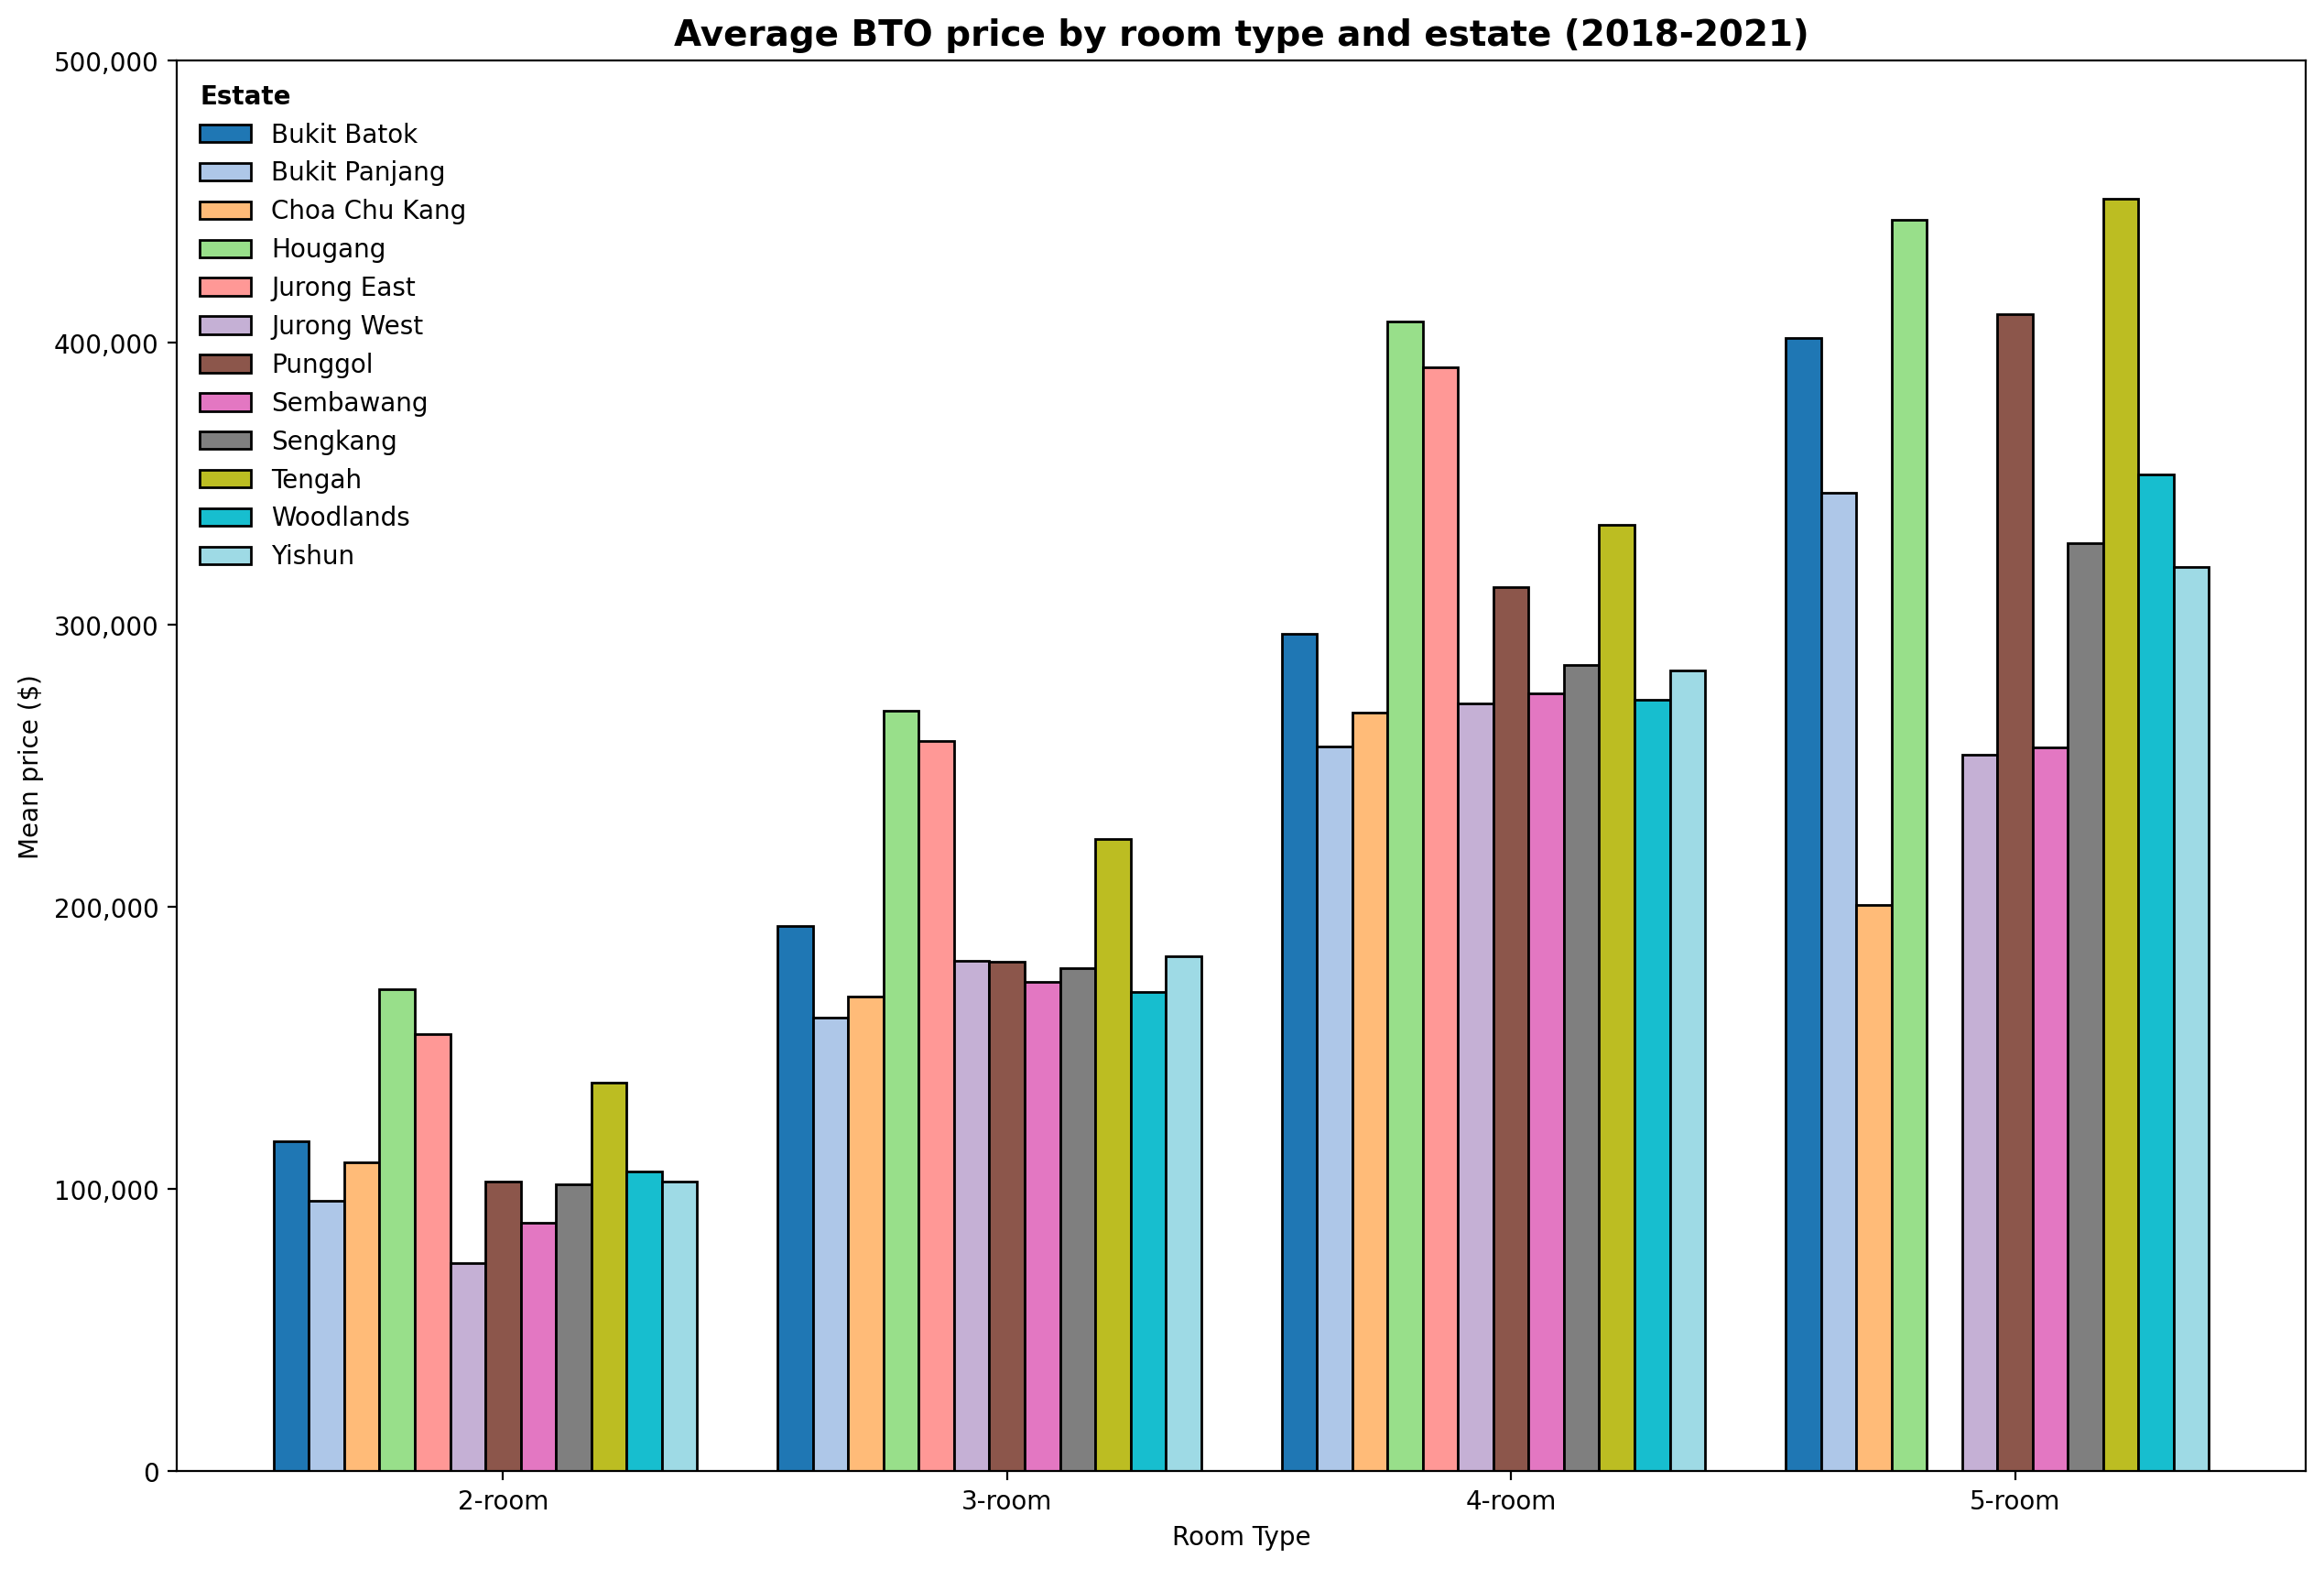

In [6]:
# Initiate figure
plt.figure(figsize=(15,10))
plt.style.use('default')

# Bar chart labels
plt.title('Average BTO price by room type and estate (2018-2021)', fontweight='bold', fontsize=14)
plt.ylabel('Mean price ($)')
plt.xlabel('Room Type')

# Bar chart ticks and tick labels
x = np.arange(len(room_types))
width = 0.07
offset = np.concatenate([-np.arange(len(estates)//2+1)[::-1], np.arange(1,len(estates)//2)]) * width # Create array of offset values evenly spaced and centred around 0 
colours = mpl.colormaps['tab20'](np.linspace(0, 1, 12)) # Select 12 colours, one for each estate

# Plot bars for each estate for each room type
for i in range(len(estates)):
    plt.bar(x+offset[i], mean_price_by_estate_room_type[i], width, color=colours[i], align='center', edgecolor='black')

# Ticks, labels and legend
plt.xticks(x, room_types)
plt.yticks(np.arange(0,600000,100000), ['{:,}'.format(i) for i in np.arange(0,600000,100000)])
plt.legend(estates, frameon=False, loc='upper left', title='Estate', title_fontproperties={'weight': 'bold'}, alignment='left')

# Show plot
plt.show()

## 2.2. HDB Loan Eligibility (HLE) applications by year <a name = '2_2'></a>

Given the relatively high costs of BTOs, loans are usually required to facilitate our housing purchases. It is therefore important to assess the accessibility of loans based on figures from past years. Using the HDB HLE dataset, the number of HLE applications per year is examined.

__Load data__

In [7]:
# Read data
hle = np.loadtxt('../02_Data/NumberofapplicationsforHDBLoanEligibilityLetters.csv', delimiter=',', skiprows=1, 
                 dtype=[('financial_year', 'u8'), ('no_of_applications', 'i8')])

# View first 5 rows
hle[:5]

array([(2008, 37939), (2009, 69201), (2010, 63760), (2011, 67805),
       (2012, 57156)],
      dtype=[('financial_year', '<u8'), ('no_of_applications', '<i8')])

__`Bar plot` of HLE applications by year__

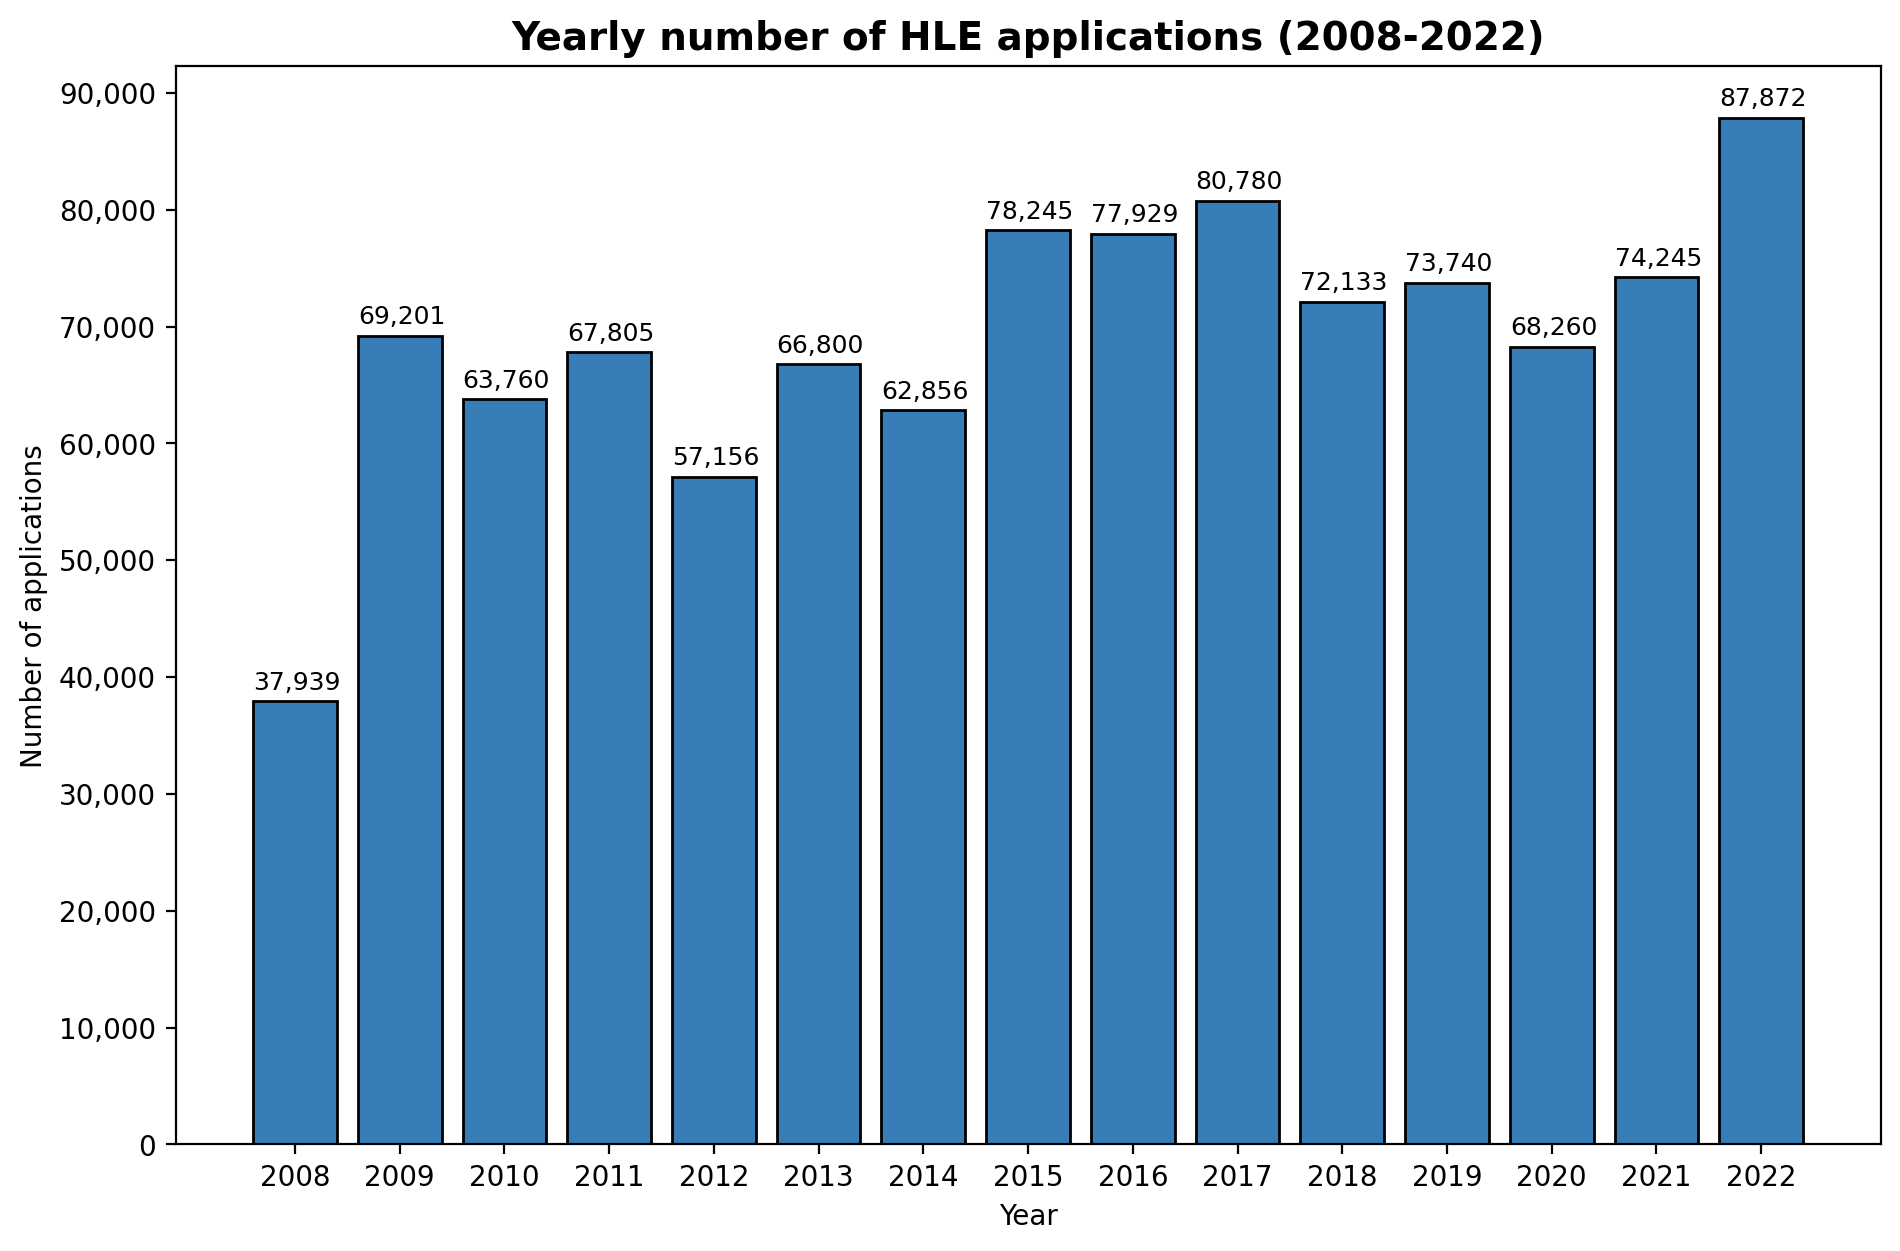

In [8]:
# Initiate figure
plt.figure(figsize=(11,7))
plt.style.use('default')

# Bar chart labels
plt.title('Yearly number of HLE applications (2008-2022)', fontweight='bold', fontsize=14)
plt.ylabel('Number of applications')
plt.xlabel('Year')

# Bar chart ticks and tick labels
plt.xticks(np.arange(2008,2023))
plt.yticks(np.arange(0,100000,10000), ['{:,}'.format(i) for i in np.arange(0,100000,10000)])

# Plot bar chart
barchart = plt.bar(hle['financial_year'], hle['no_of_applications'], color='#377eb8', edgecolor='black')

# Show bar chart values for each year
for i in range(len(barchart)):
    bar = barchart[i]
    x, y = bar.get_xy()
    h = bar.get_height()
    plt.text(x, h+1000, "{:,}".format(hle['no_of_applications'][i]), fontsize=9)

# Show plot
plt.show()

## 2.3. HDB grants by year <a id = '2_3'></a>

In addition to loans, housing grants can considerably offset the costs of housing in Singapore. Here, the CPF housing grants dataset is used to visualise the type and number of grants disbursed from 2010 to 2022.

__Load data__

In [9]:
# Read data and fill NA where applicable
grants = np.genfromtxt('../02_Data/CPFHousingGrantsAwardedbyType.csv', delimiter=',', skip_header=1, 
                       dtype=[('financial_year', 'u8'), ('housing_grant_scheme', 'U50'), ('type_of_grant', 'U50'), ('no_of_hh', 'i8')], 
                       missing_values=['na'], filling_values=0)

# I prefer caps NA so replace values accordingly
grants['type_of_grant'][grants['type_of_grant'] == 'na'] = 'NA'

# View first 5 rows
grants[:5]

array([(2010, 'CPF Housing Grant', 'Family Grant (living near parents/married child)',  2249),
       (2010, 'CPF Housing Grant', 'Family Grant',  4198),
       (2010, 'CPF Housing Grant', 'Singles Grant',   926),
       (2010, 'CPF Housing Grant', 'Joint Singles Grant',    59),
       (2010, 'Additional CPF Housing Grant', 'NA', 10307)],
      dtype=[('financial_year', '<u8'), ('housing_grant_scheme', '<U50'), ('type_of_grant', '<U50'), ('no_of_hh', '<i8')])

__Descriptive stats__

In [10]:
# Define variables for header print
header = ' CPF housing grants disbursed from 2010 to 2022 '
grants_len = len(grants)

# Print header
print(f'{header:*^{len(header)+10}}')

# Print number of rows in dataset
print(f'There are a total of {grants_len:,} rows in this dataset')

# Get unique grant schemes
grant_schemes = np.unique(grants['housing_grant_scheme'])
years = np.unique(grants['financial_year'])

# Descriptive stats for each grant scheme
print(f'Within this dataset, there are {len(grant_schemes)} different housing grant schemes: {*grant_schemes,}')

***** CPF housing grants disbursed from 2010 to 2022 *****
There are a total of 95 rows in this dataset
Within this dataset, there are 4 different housing grant schemes: ('Additional CPF Housing Grant', 'CPF Housing Grant', 'Proximity Housing Grant', 'Special CPF Housing Grant')


__`Line plot` of number of grants disbursed each year__

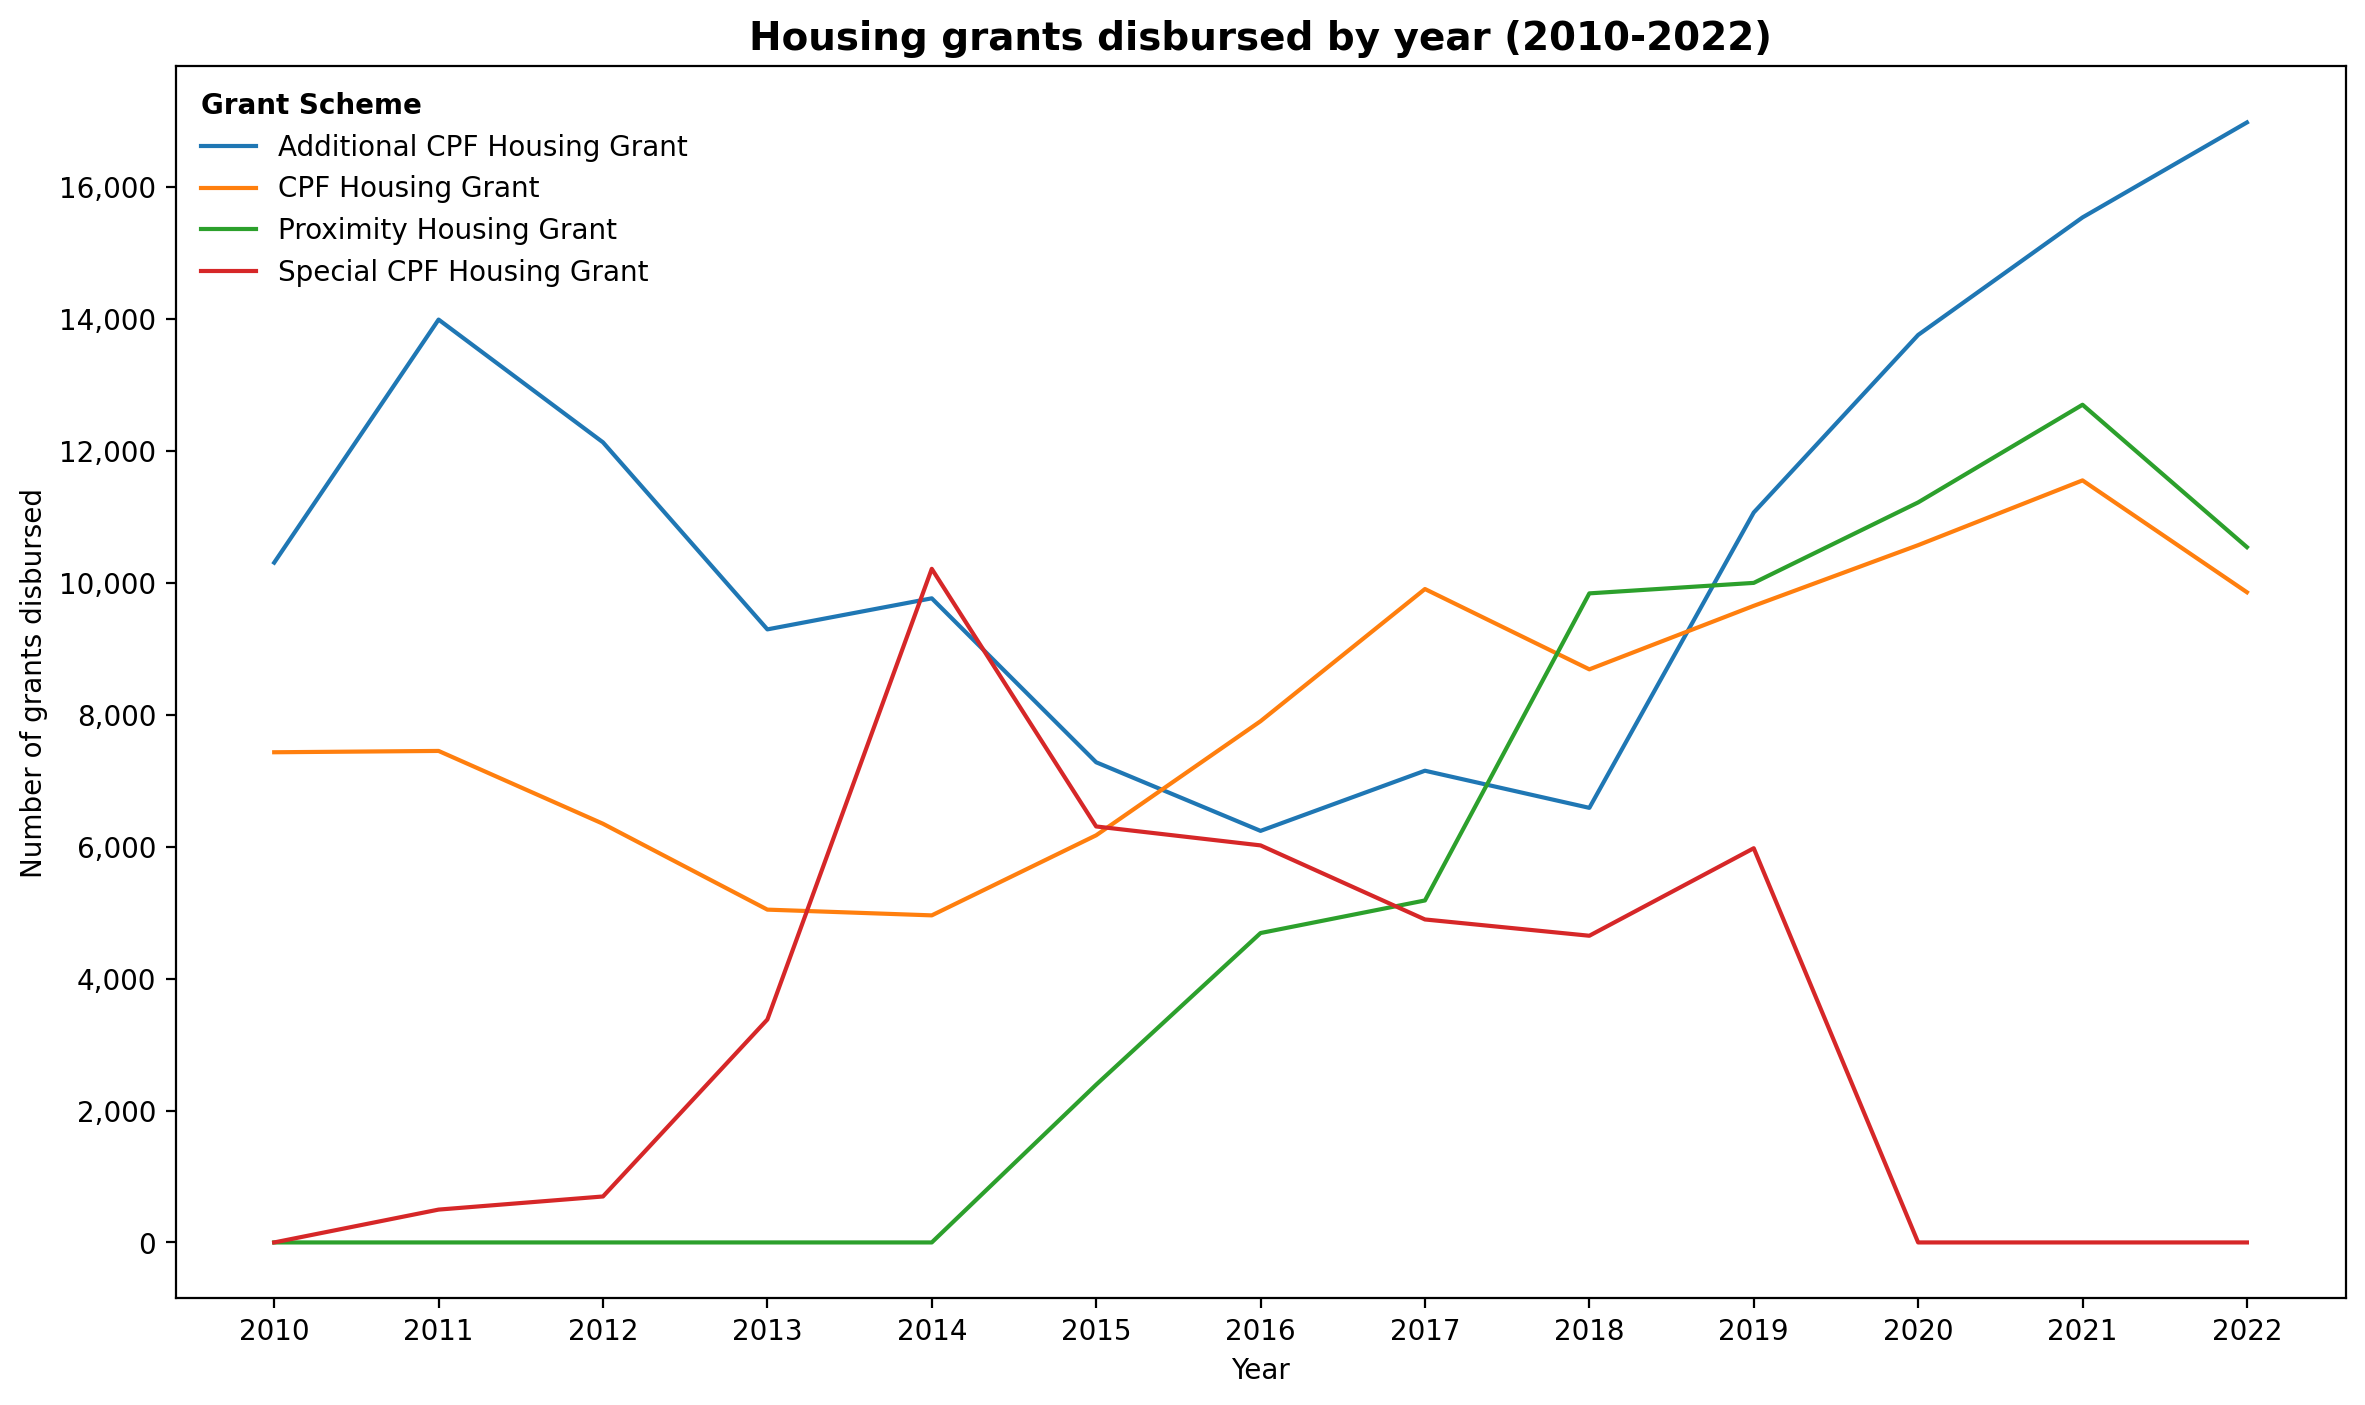

In [11]:
# Store total number of grant each year for each grant scheme as a list of arrays
hh_by_grant = []

# Iterate through each grant scheme: one grant scheme = one array
for grant in grant_schemes:
    hh_sum = []
    # Iterate through each year and sum total number of grants disbursed for the grant scheme
    for year in years:
        hh_sum.append(np.sum(grants[(grants['financial_year'] == year) & (grants['housing_grant_scheme'] == grant)]['no_of_hh']))
    # Append array of grant schemes disbursed for each year to hh_by_grant list
    hh_by_grant.append(np.array(hh_sum))

# Initiate figure
plt.figure(figsize=(14,8))
plt.style.use('default')

# Line plot labels
plt.title('Housing grants disbursed by year (2010-2022)', fontweight='bold', fontsize=14)
plt.ylabel('Number of grants disbursed')
plt.xlabel('Year')

# Line plot ticks and tick labels
plt.xticks(np.arange(2010,2023))
plt.yticks(np.arange(0,21000,2000), ['{:,}'.format(i) for i in np.arange(0,21000,2000)])

# Define colours for each grant scheme
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Separate lines for each grant scheme
for i in range(len(hh_by_grant)):
    plt.plot(years, hh_by_grant[i], label=grant_schemes[i], c=colours[i])

# Legend
plt.legend(grant_schemes, frameon=False, loc='upper left', title='Grant Scheme', title_fontproperties={'weight': 'bold'}, alignment='left')

# Show boxplot
plt.show()

## 2.4. HDB resale prices <a id = '2_4'></a>

Despite having loans and grants available, BTOs may still be pricey or wait times for BTOs to be built may be too long. As such, some home owners may look to purchasing resale flats as an alternative. The HDB resale price data from 2017-2024 is examined to determine whether there are feasible resale options for home owners to explore.

__Load data__

In [12]:
# Read data and fill NA where applicable
resale = np.genfromtxt('../02_Data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv', delimiter=',', skip_header=1, 
                       dtype=[('month', 'U50'), ('town', 'U50'), ('flat_type', 'U50'), ('block', 'U10'), ('street_name', 'U50'), ('storey_range', 'U50'), 
                              ('floor_area_sqm', 'f8'), ('flat_model', 'U50'), ('lease_commence_date', 'u8'), ('remaining_lease', 'U50'), ('resale_price', 'f8')], 
                        missing_values=['na'], filling_values=0)

# View first 5 rows
resale[:5]

array([('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000.),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000.),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000.),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000.),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000.)],
      dtype=[('month', '<U50'), ('town', '<U50'), ('flat_type', '<U50'), ('block', '<U10'), ('street_name', '<U50'), ('storey_range', '<U50'), ('floor_area_sqm', '<f8'), ('flat_model', '<U50'), ('lease_commence_date', '<u8'), ('remaining_lease', '<U50'), ('resale_price', '<f8')])

__Descriptive stats__

In [13]:
# Define variables for header print
header = ' Resale flat prices from Jan 2017 to May 2024 '
resale_len = len(resale)

# Print header
print(f'{header:*^{len(header)+10}}')

# Print number of rows in dataset
print(f'There are a total of {resale_len:,} rows in this dataset\n')

# Get unique flat types
flat_types = np.unique(resale['flat_type'])

# Descriptive stats for each flat type
print(f'Within this dataset, there are {len(flat_types)} unique flat types')
print('For each flat type, the following stats and information are extracted to elucidate trends in HDB prices across the resale market\n')

# Create empty lists for appending descriptive stats for each flat type
mean_price_by_flat_type = []
price_sd_by_flat_type = []
max_price_by_flat_type = []
min_price_by_flat_type = []
estate_of_max_price_by_flat_type = []
month_of_max_price_by_flat_type = []
lease_of_max_price_by_flat_type = []
estate_of_min_price_by_flat_type = []
month_of_min_price_by_flat_type = []
lease_of_min_price_by_flat_type = []

# Iterate through list of flat types to filter dataset relevant to each flat type
for i in flat_types:
    # Filter and get stats for each flat type
    mean_price = round(np.mean(resale[resale['flat_type'] == i]['resale_price']), 2)
    price_std = round(np.std(resale[resale['flat_type'] == i]['resale_price']), 2)
    max_price = np.max(resale[resale['flat_type'] == i]['resale_price'])
    min_price = np.min(resale[resale['flat_type'] == i]['resale_price'])
    estate_max = resale[np.argmax(resale[resale['flat_type'] == i]['resale_price'])]['town']
    month_max = resale[np.argmax(resale[resale['flat_type'] == i]['resale_price'])]['month']
    lease_max = resale[np.argmax(resale[resale['flat_type'] == i]['resale_price'])]['remaining_lease']
    estate_min = resale[np.argmin(resale[resale['flat_type'] == i]['resale_price'])]['town']
    month_min = resale[np.argmin(resale[resale['flat_type'] == i]['resale_price'])]['month']
    lease_min = resale[np.argmin(resale[resale['flat_type'] == i]['resale_price'])]['remaining_lease']

    # Append summary statistic for each flat type into respective list
    mean_price_by_flat_type.append(mean_price)
    price_sd_by_flat_type.append(price_std)
    max_price_by_flat_type.append(max_price)
    min_price_by_flat_type.append(min_price)
    estate_of_max_price_by_flat_type.append(estate_max)
    month_of_max_price_by_flat_type.append(month_max)
    lease_of_max_price_by_flat_type.append(lease_max)
    estate_of_min_price_by_flat_type.append(estate_min)
    month_of_min_price_by_flat_type.append(month_min)
    lease_of_min_price_by_flat_type.append(lease_min)

# Print out stats for each flat type
for i in range(len(flat_types)):
    print(f'{flat_types[i]:*^{len(flat_types[i])+6}}')
    print(f'Mean: ${mean_price_by_flat_type[i]:,.2f}')
    print(f'Standard deviation: ${price_sd_by_flat_type[i]:,.2f}')
    print(f'Max: ${max_price_by_flat_type[i]:,.2f}')
    print(f'Estate of max resale price transaction: {estate_of_max_price_by_flat_type[i]}')
    print(f'Month of max resale price transaction: {month_of_max_price_by_flat_type[i]}')
    print(f'Lease remaining for unit with max resale price: {lease_of_max_price_by_flat_type[i]}')
    print(f'Min: ${min_price_by_flat_type[i]:,.2f}')
    print(f'Estate of min resale price transaction: {estate_of_min_price_by_flat_type[i]}')
    print(f'Month of min resale price transaction: {month_of_min_price_by_flat_type[i]}')
    print(f'Lease remaining for unit with min resale price: {lease_of_min_price_by_flat_type[i]}\n')

***** Resale flat prices from Jan 2017 to May 2024 *****
There are a total of 179,586 rows in this dataset

Within this dataset, there are 7 unique flat types
For each flat type, the following stats and information are extracted to elucidate trends in HDB prices across the resale market

***1 ROOM***
Mean: $201,222.88
Standard deviation: $27,304.20
Max: $258,000.00
Estate of max resale price transaction: BEDOK
Month of max resale price transaction: 2017-01
Lease remaining for unit with max resale price: 63 years 06 months
Min: $157,000.00
Estate of min resale price transaction: ANG MO KIO
Month of min resale price transaction: 2017-01
Lease remaining for unit with min resale price: 62 years

***2 ROOM***
Mean: $275,388.53
Standard deviation: $55,218.16
Max: $585,000.00
Estate of max resale price transaction: BUKIT BATOK
Month of max resale price transaction: 2017-03
Lease remaining for unit with max resale price: 79 years 09 months
Min: $150,000.00
Estate of min resale price transactio

__`Boxplot` of resale price by flat type__

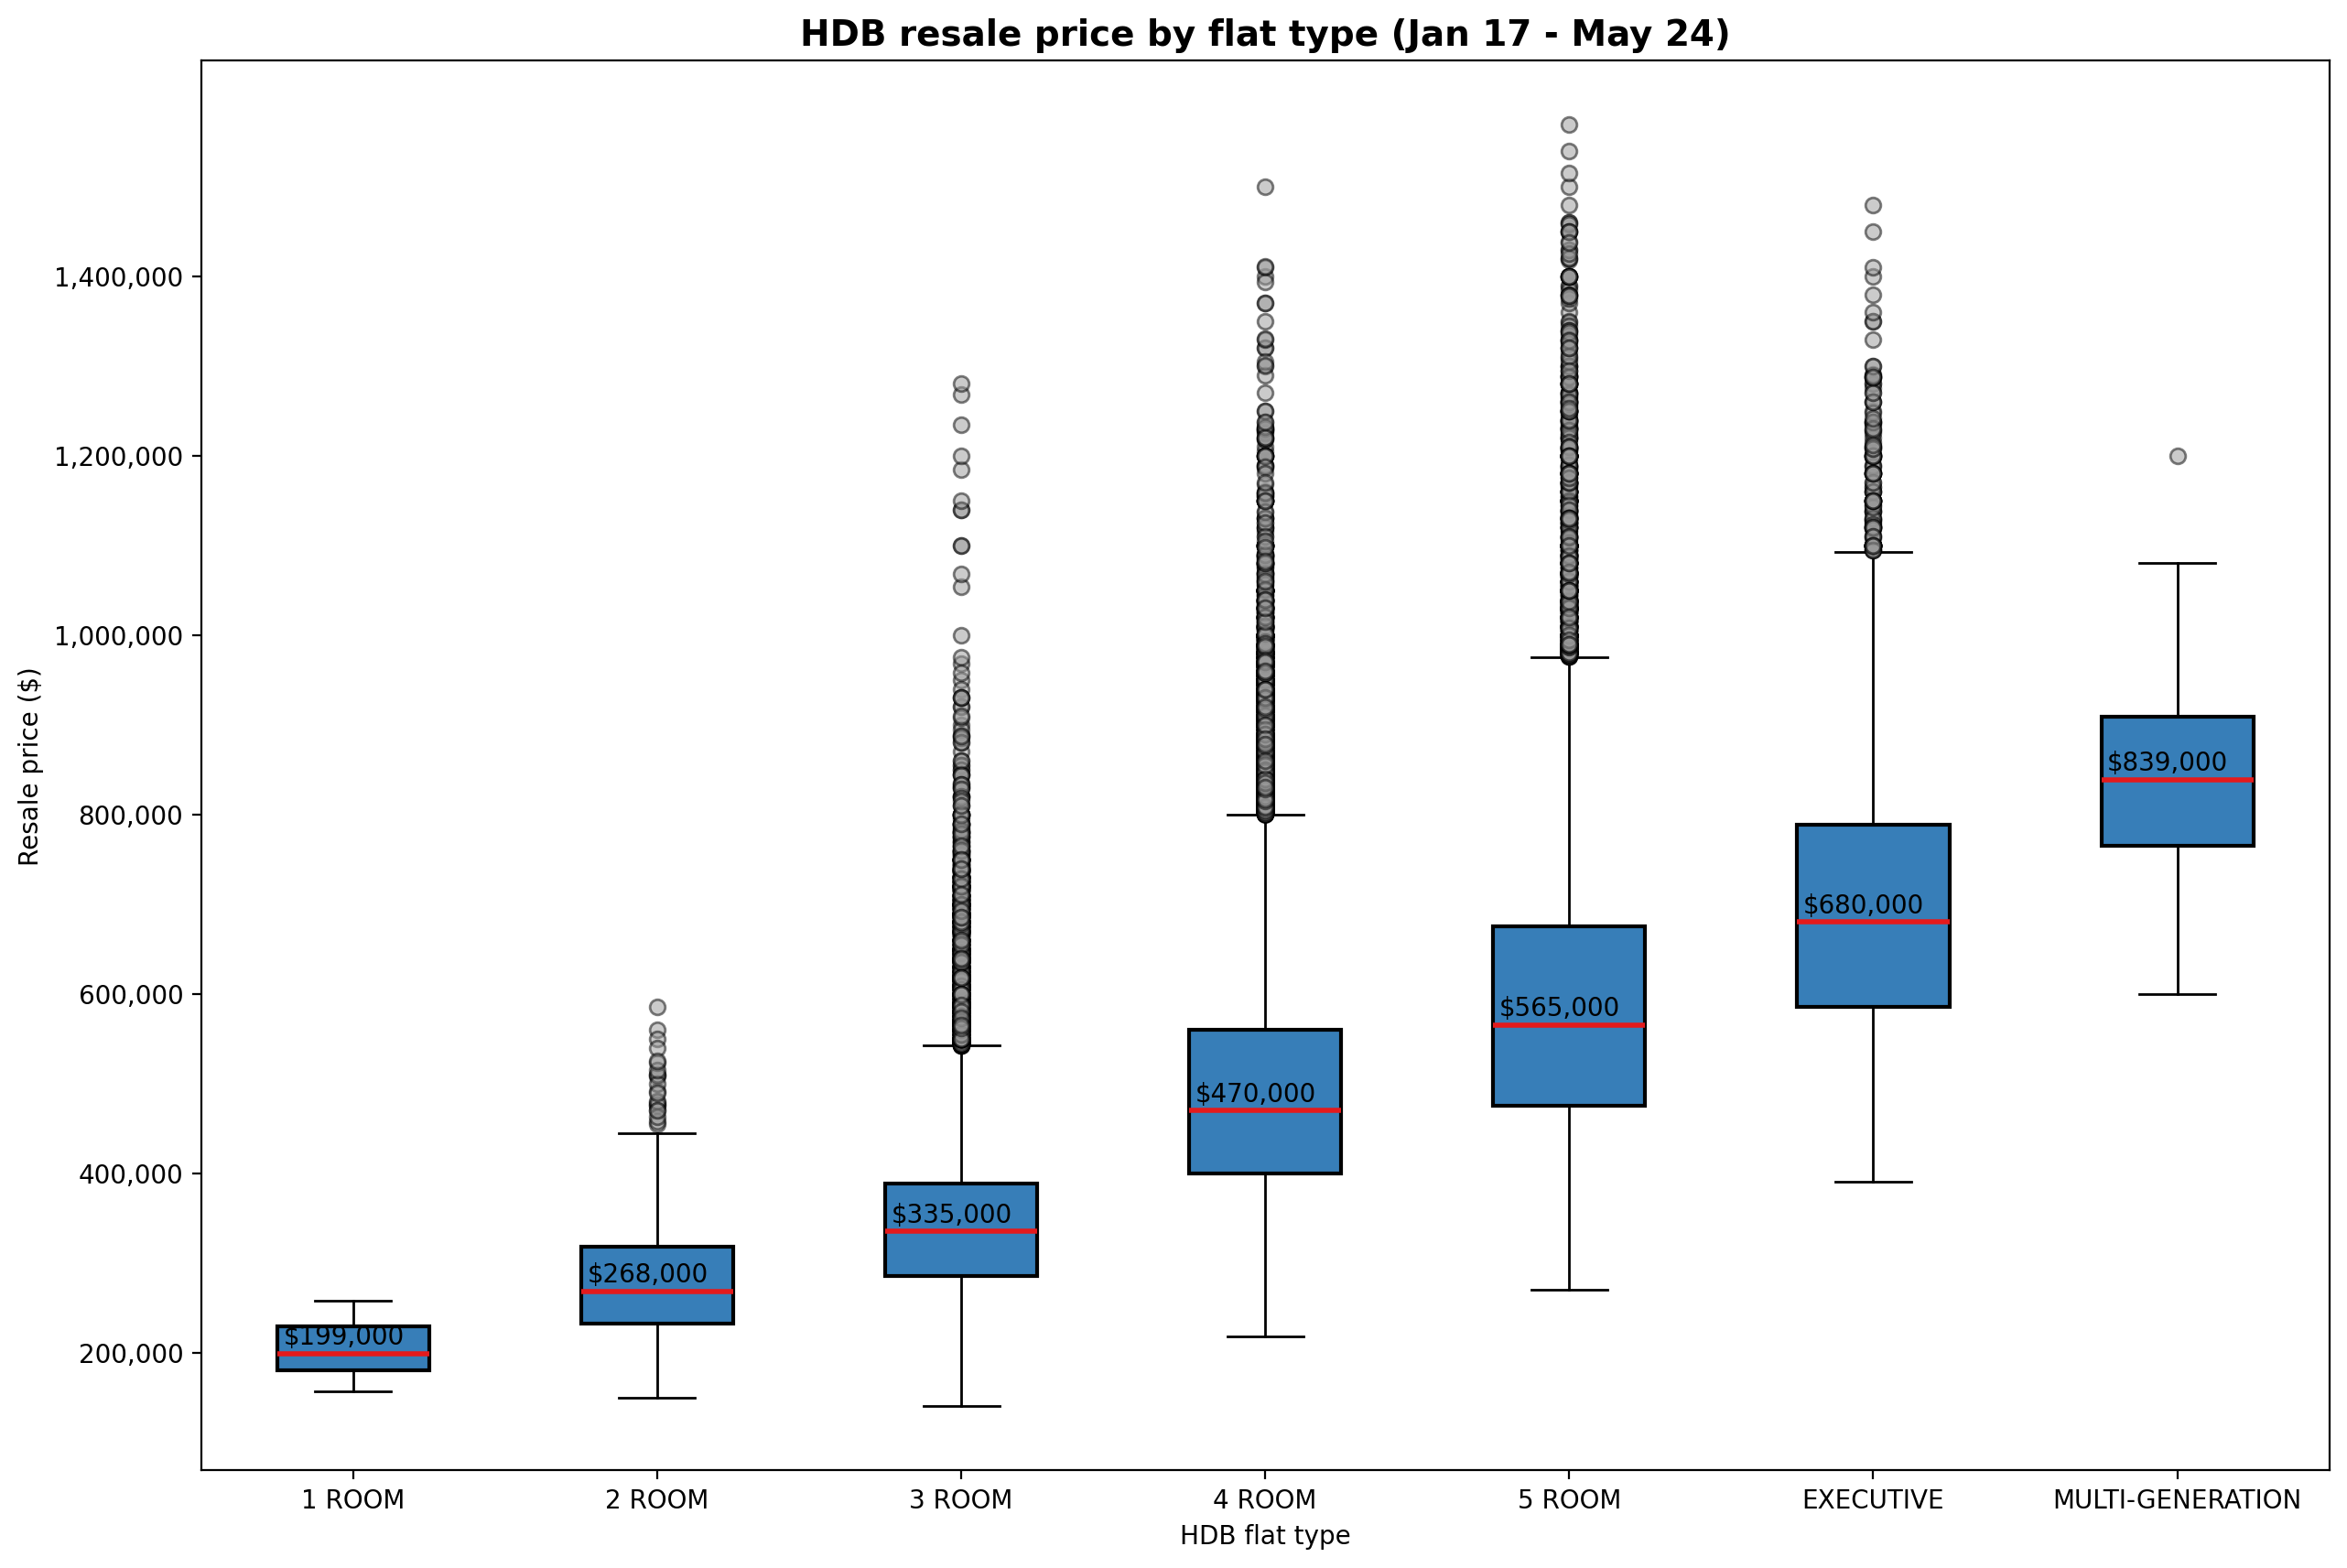

In [14]:
# Store resale price values for each flat type as a list of arrays
resale_price_combined = []
for flat_type in flat_types:
    resale_price_combined.append(resale[resale['flat_type'] == flat_type]['resale_price'])

# Initiate figure
plt.figure(figsize=(15,10))
plt.style.use('default')

# Boxplot labels
plt.title('HDB resale price by flat type (Jan 17 - May 24)', fontweight='bold', fontsize=14)
plt.ylabel('Resale price ($)')
plt.xlabel('HDB flat type')

# Boxplot ticks and tick labels
plt.yticks(np.arange(0,1600000, 200000), ['{:,}'.format(i) for i in np.arange(0,1600000, 200000)])

# Create boxplot object
bp = plt.boxplot(resale_price_combined, labels=flat_types, patch_artist=True)

# Customise boxplot
for box in bp['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='#377eb8')

for median in bp['medians']:
    median.set(color='#e41a1c', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='#999999', alpha=0.5)

# Dsiplay median values as text for each flat type
for line in bp['medians']:
    # Get coordinates of each median line
    x, y = line.get_xydata()[0]
    # Format and print
    plt.text(x+0.02, y+10000, '${:,.0f}'.format(y))

# Show boxplot
plt.show()

__`Scatterplot` of resale price by location__

In [15]:
# Concatenate block and street name to get full address
address = []

for i in range(len(resale)):
    block_street_name = resale[i]['block'] + ' ' + resale[i]['street_name']
    address.append(block_street_name)

# Get unique address to reduce number of API calls
unique_address = np.unique(address)

# Geocode full address to obtain latitude and longitude coordinates stored in dictionary
# Pre-defined function used in helperFunc module, returns dict of latitude and longitude for each address
# address_dict = get_coordinates(unique_address)

# Magic function to store address_dict for easy retrieval should kernel be restarted
%store -r address_dict 

In [16]:
# Retrieve address details for each record in original address array
latitude = [address_dict[i]['latitude'] for i in address]
longitude = [address_dict[i]['longitude'] for i in address]

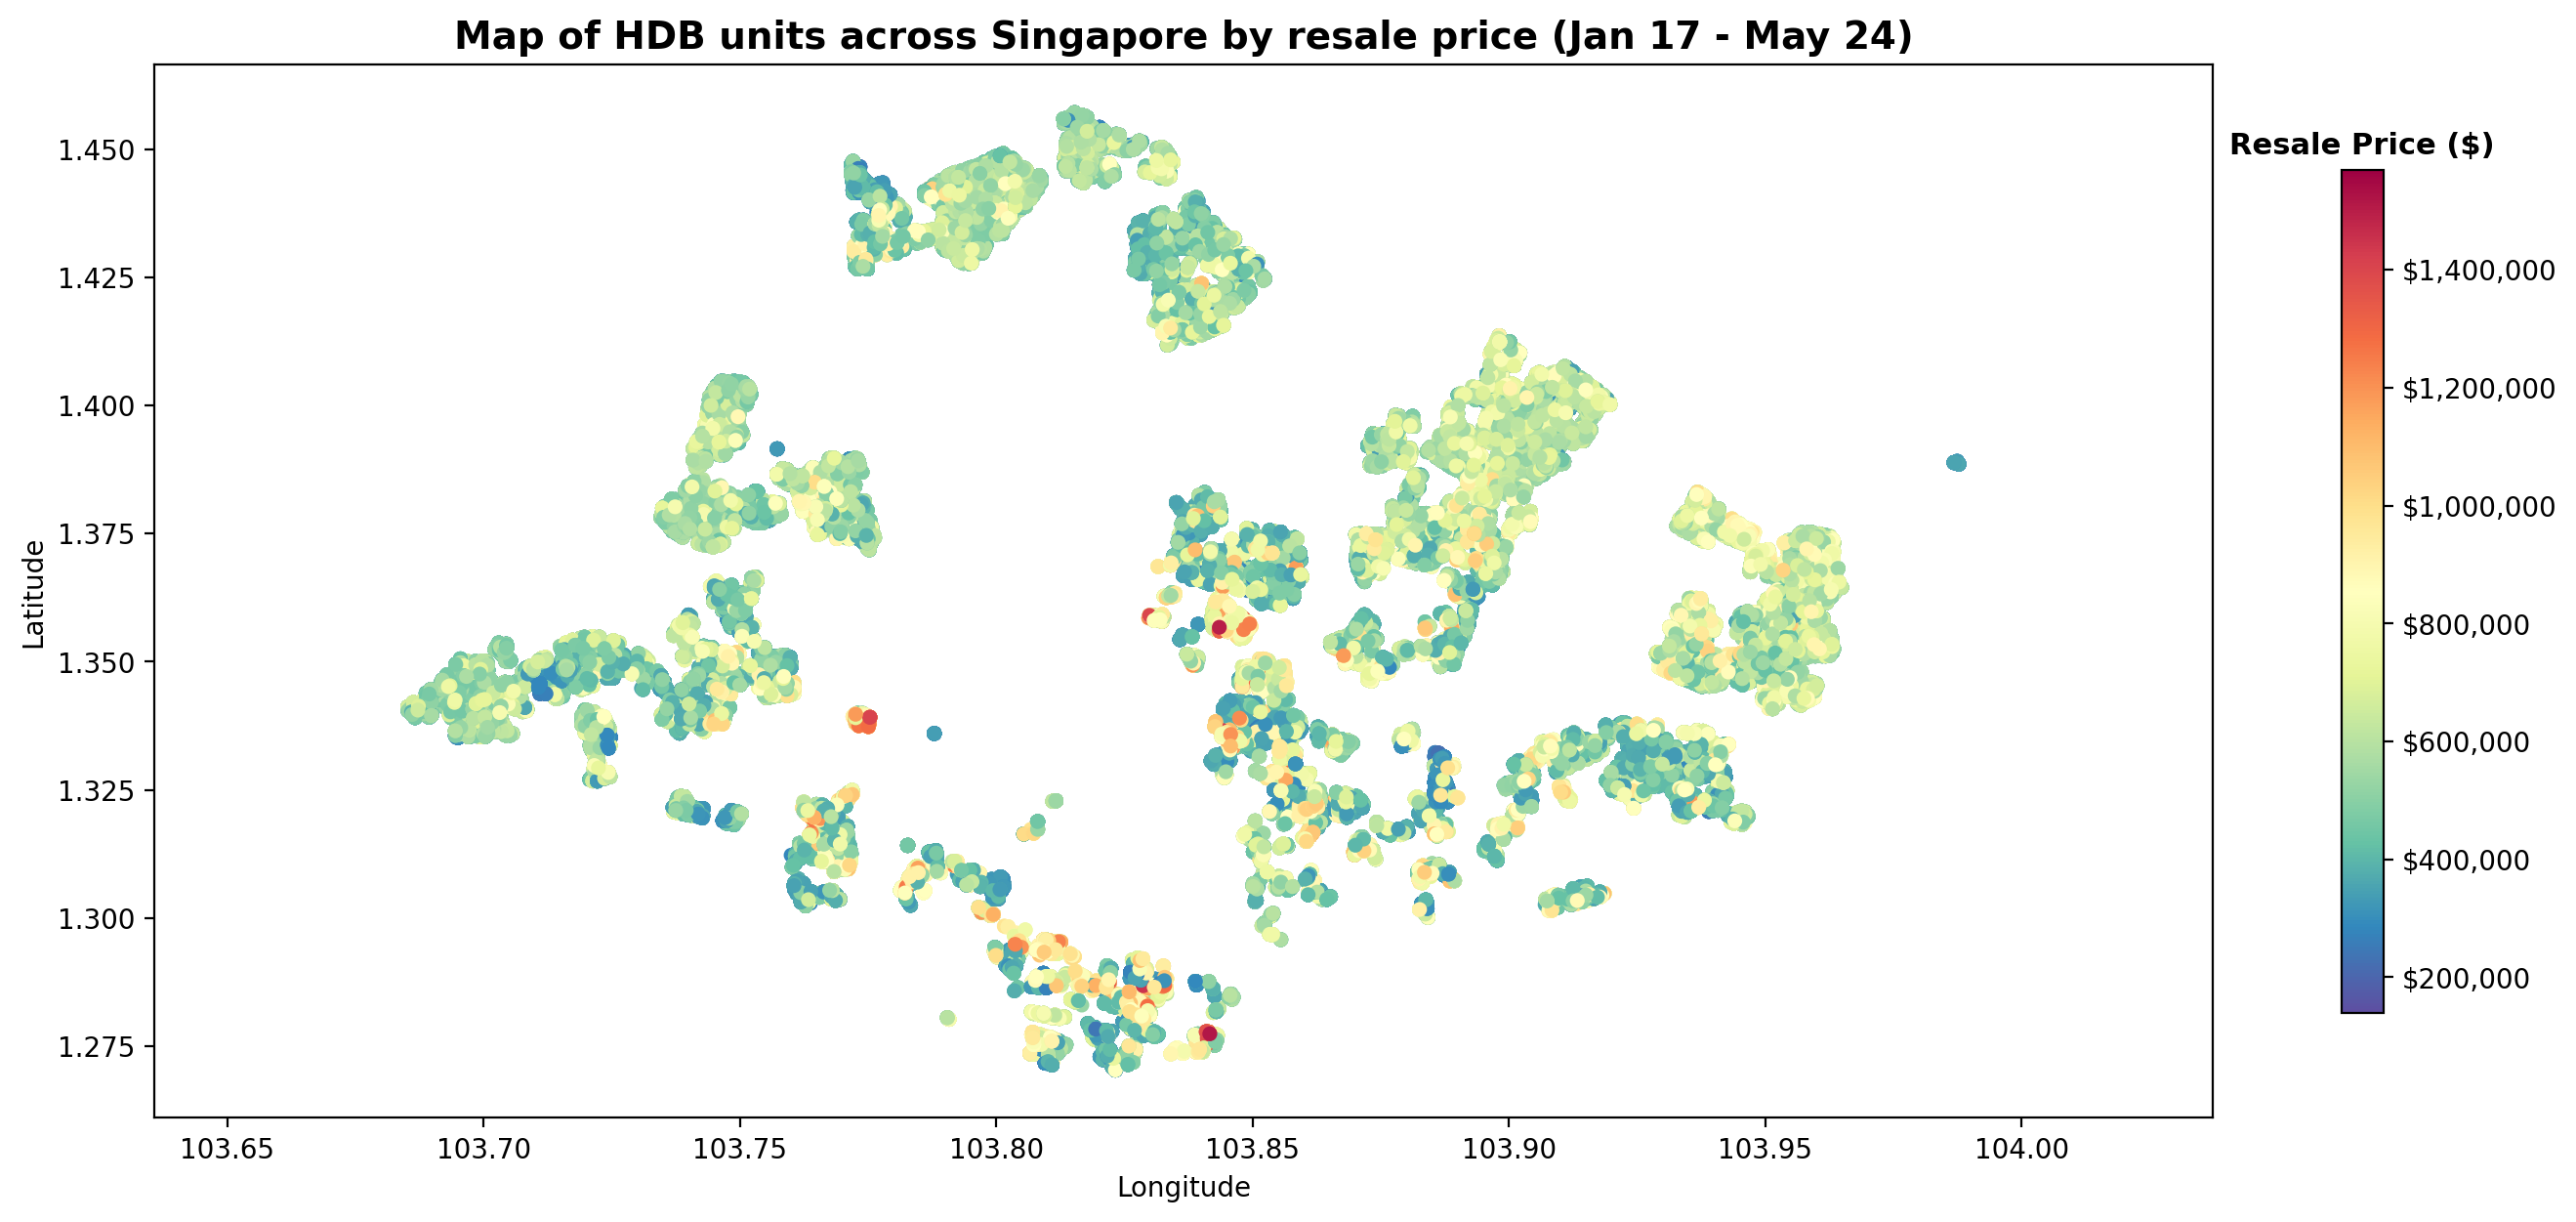

In [23]:
# Initiate figure
plt.figure(figsize=(17,7))
plt.style.use('default')

# Scatterplot labels
plt.title('Map of HDB units across Singapore by resale price (Jan 17 - May 24)', fontweight='bold', fontsize=14)
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Plot location of resale HDB units with resale price as colour gradient
plt.scatter(x=longitude, y=latitude, c=resale['resale_price'], cmap='Spectral_r', s=20)

# Set equal axis for scaling
plt.axis('equal')

# Colour bar for to display resale price gradient
cbar = plt.colorbar(location='right', shrink=0.8, pad=0.05)

# Format colour bar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))
cbar.ax.set_title('Resale Price ($)', fontsize=11, fontweight='bold', horizontalalignment='center')

# Show scatterplot
plt.show()

## 2.5. HDB rental prices <a id = '2_5'></a>

As a last resort, home owners may look to rent a place of their own should they be unable to purchase a BTO or resale flat. Hence, the HDB rental data from 2021 to 2024 is analysed to identity alternatives.

__Load data__

In [18]:
# Read data and fill NA where applicable
rent = np.genfromtxt('../02_Data/RentingOutofFlats2024CSV.csv', delimiter=',', skip_header=1,
                     dtype=[('rent_approval_date', 'U50'), ('town', 'U50'), ('block', 'U10'),
                            ('street_name', 'U50'), ('flat_type', 'U50'), ('monthly_rent', 'i8')],
                    missing_values=['na'], filling_values=0)

# View first 5 rows
rent[:5]

array([('2021-01', 'ANG MO KIO', '105', 'ANG MO KIO AVE 4', '4-ROOM', 2000),
       ('2021-01', 'ANG MO KIO', '107', 'ANG MO KIO AVE 4', '3-ROOM', 1750),
       ('2021-01', 'ANG MO KIO', '108', 'ANG MO KIO AVE 4', '3-ROOM', 1750),
       ('2021-01', 'ANG MO KIO', '111', 'ANG MO KIO AVE 4', '5-ROOM', 2230),
       ('2021-01', 'ANG MO KIO', '111', 'ANG MO KIO AVE 4', '5-ROOM', 2450)],
      dtype=[('rent_approval_date', '<U50'), ('town', '<U50'), ('block', '<U10'), ('street_name', '<U50'), ('flat_type', '<U50'), ('monthly_rent', '<i8')])

__`Scatterplot` of monthly rent by location__

In [19]:
# Concatenate block and street name to get full address
address = []

for i in range(len(rent)):
    block_street_name = rent[i]['block'] + ' ' + rent[i]['street_name']
    address.append(block_street_name)

# Get unique address to reduce number of API calls
unique_address = np.unique(address)

# Geocode full address to obtain latitude and longitude coordinates stored in dictionary
# Pre-defined function used in helperFunc module, returns dict of latitude and longitude for each address
# address_dict_2 = get_coordinates(unique_address)

# Magic function to store address_dict for easy retrieval should kernel be restarted
%store -r address_dict_2

In [20]:
# Retrieve address details for each record in original address array
latitude_2 = [address_dict_2[i]['latitude'] for i in address]
longitude_2 = [address_dict_2[i]['longitude'] for i in address]

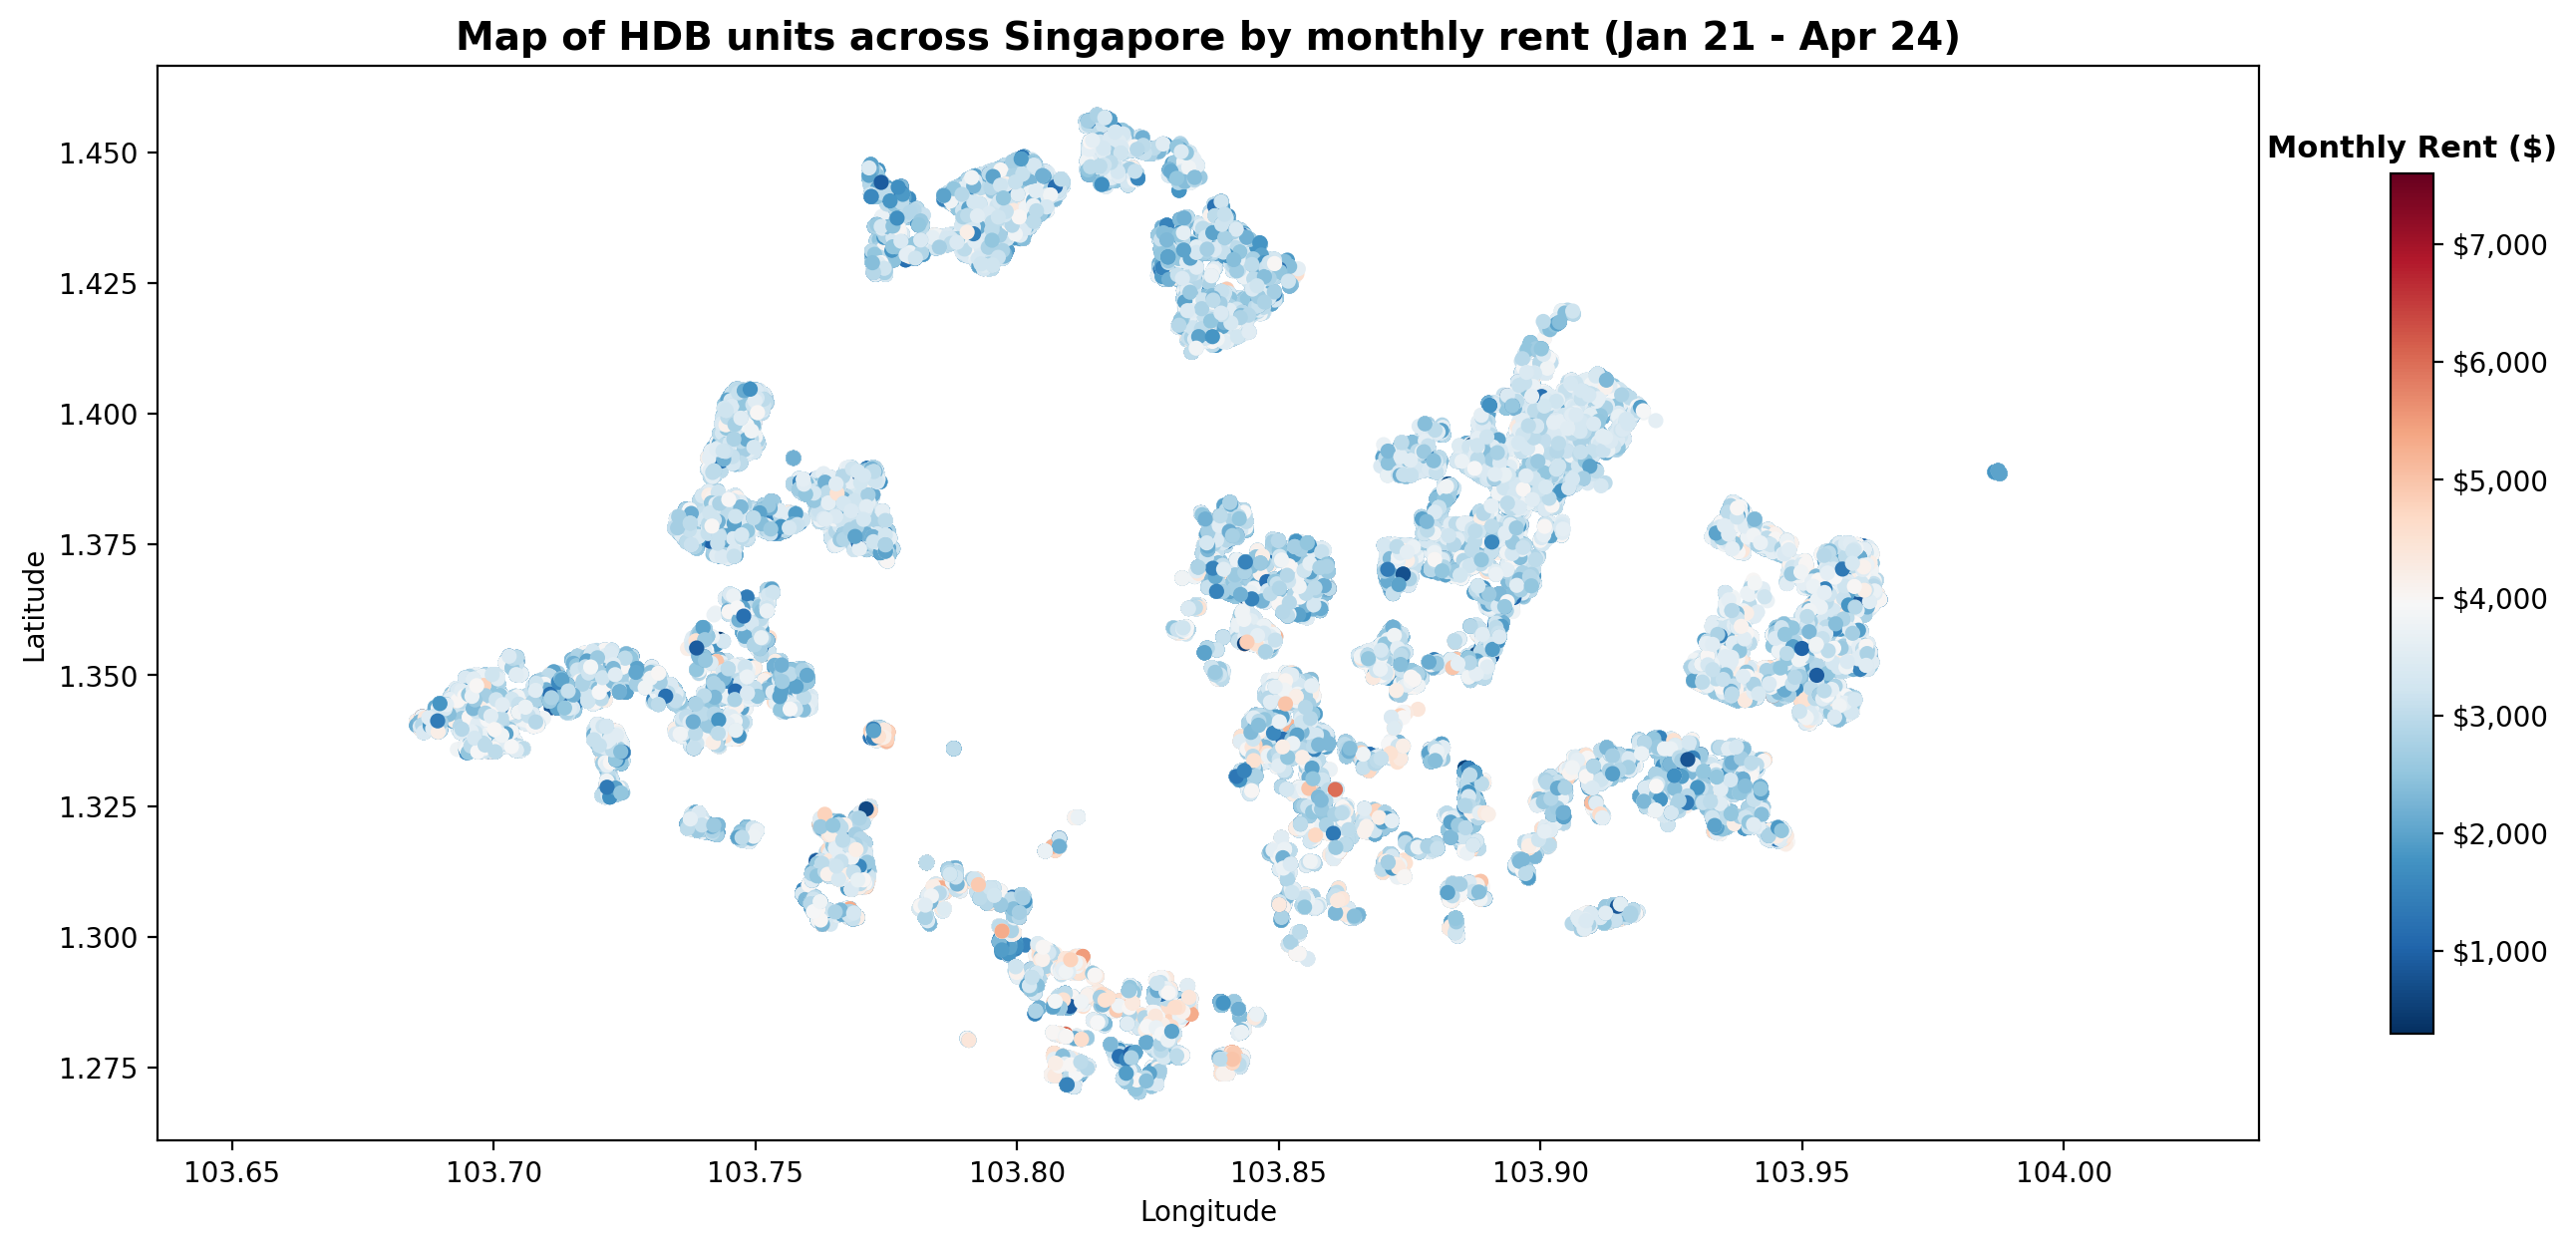

In [21]:
# Initiate figure
plt.figure(figsize=(17,7))
plt.style.use('default')

# Scatterplot labels
plt.title('Map of HDB units across Singapore by monthly rent (Jan 21 - Apr 24)', fontweight='bold', fontsize=14)
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Plot location of HDB units with monthly rent as colour gradient
plt.scatter(x=longitude_2, y=latitude_2, c=rent['monthly_rent'], cmap='RdBu_r', s=20)

# Set equal axis for scaling
plt.axis('equal')

# Colour bar for to display monthly rent gradient
cbar = plt.colorbar(location='right', shrink=0.8, pad=0.05)

# Format colour bar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))
cbar.ax.set_title('Monthly Rent ($)', fontsize=11, fontweight='bold', horizontalalignment='center')

# Show scatterplot
plt.show()

# 3. Limitations of Study <a id = '3'></a> 

While the visualisations provide some guidance to home owners for their housing purchases, it is worth noting that prices were aggregated over multiple years without accounting for inflation in this analysis. <br> 
To overcome this, future work can look to calculate the net present value (NPV) based on historical prices to more accurately compare numbers across the various housing options, flat types, and estates. <br>

Additionally, the scatter plots produced in this analysis could include the map of Singapore in the background. However, such visualisation requires other libraries such as geopandas which is out of the scope of the module assignment. Future work can look to include an overlay of the [Singapore master plan boundary](https://beta.data.gov.sg/datasets/d_6c6d7361dd826d97b91bac914ca6b2ac/view) with estate delineation for more intuitive identification of where each point is located.